In [51]:
import os
import youtube_dl
import pytube
import csv
import yt_dlp
from MetadataParser import MetadataParser
import pathlib

### Helper Functions

In [52]:
downloaded_audio_folder = os.getcwd() + "/downloaded_audio"
if not os.path.exists(downloaded_audio_folder):
	os.makedirs(downloaded_audio_folder)

# Youtube download and post-processing options
ydl_opts = {
	'outtmpl': os.path.join(downloaded_audio_folder, u'%(id)s.%(ext)s'),
	'format': 'bestaudio/best',
	'postprocessors': [{
		'key': 'FFmpegExtractAudio',
		'preferredcodec': 'mp3',
		'preferredquality': '192',
	}],
}

In [53]:
def get_info_from_youtube(youtube_id):
	global ydl_opts
	try:
		with youtube_dl.YoutubeDL(ydl_opts) as ydl:
			x = ydl.extract_info('http://www.youtube.com/watch?v='+youtube_id, download=False)
			# video_length = x['duration']
			return x
	except (KeyboardInterrupt):
		raise
	except:
		print ("Video connection failed.")
		return None

def download_and_report(youtube_id, redownload=False, sleep=0, downloaded_audio_folder=downloaded_audio_folder):
	global ydl_opts
	if (not os.path.exists(downloaded_audio_folder + "/" + youtube_id + ".mp3")) or (redownload):
		try:
			with yt_dlp.YoutubeDL(ydl_opts) as ydl:
				x = ydl.download(['http://www.youtube.com/watch?v='+youtube_id])
			print("Successfully downloaded ({0})".format(youtube_id))
			return "downloaded"
			time.sleep(sleep)
		except (KeyboardInterrupt):
			raise
		except:
			print("Error downloading video ({0})".format(youtube_id))
			if (not os.path.exists(downloaded_audio_folder + "/" + youtube_id + ".txt")):
				open(downloaded_audio_folder + "/" + youtube_id + ".txt", 'a').close()
			return "error"
	else:
		return "downloaded"

### Youtube download

In [ ]:
data = []
# read the csv file at 'matching-salami/salami_youtube_pairings.csv'
with open('matching-salami/salami_youtube_pairings.csv', 'r') as f:
    reader = csv.DictReader(f)
    data = list(reader) 
    print(data[0].keys())
    
for row in data:
    # salami_id, youtube_id, coverage_percent
    print(row['salami_id'], row['youtube_id'], row['coverage_percent'])

In [54]:
for i in range(0, 10):
    row = data[i]
    print(row['salami_id'], row['youtube_id'], row['coverage_percent'])
    #download_and_report(row['youtube_id'])

2 DKzFw_i6Ffg 0.9871601208459213
3 E6iGez4BLjQ 0.9770015621452559
4 ct8gCRPST9s 0.9847744689983114
5 IBdrzoz9o0o 0.9655935147091493
6 QurVLnYoFqo 0.9591317950723504
7 50JtpsgyQF4 0.9669518808792127
8 HF03S-1mVR8 0.9669203747072601
10 s08jD3E6Mpg 0.9734837846847354
11 bbC_8YrU3D4 0.9753821273946551
12 3noiG0gtlbU 0.9633211133913198


### Alignment?

IDK how to do this, but just install the following stuff and then run align_audio.py from matching-salami.

`
sudo apt-get install sox libsox-fmt-mp3
`

In [55]:
transformed_audio_folder = os.getcwd() + "/transformed_audio"

In [56]:
PROJECT_ROOT = pathlib.Path('.').resolve()
metadata_path = PROJECT_ROOT/'salami-data-public'/'metadata'/'metadata.csv'
parser = MetadataParser(metadata_path)

In [57]:
def get_annotation_text(row):
    print(row['salami_id'], parser.metadata[(row['salami_id'])][2], parser.metadata[(row['salami_id'])][3])
    if os.path.exists(downloaded_audio_folder + "/" + row['youtube_id'] + ".mp3"):
        print(row['salami_id'], row['youtube_id'], row['coverage_percent'])
        metadata = parser.metadata[(row['salami_id'])]
        if(metadata[5] != ''):
            textfile_1_path = PROJECT_ROOT/'salami-data-public'/'annotations'/row['salami_id']/'parsed'/'textfile1_functions.txt'
            with open(textfile_1_path, 'r') as f:
                textfile_1 = f.read()
                print("=== Annotation 1 ===")
                print(textfile_1)
        if(metadata[6] != ''):
            textfile_2_path = PROJECT_ROOT/'salami-data-public'/'annotations'/row['salami_id']/'parsed'/'textfile2_functions.txt'
            with open(textfile_2_path, 'r') as f:
                textfile_2 = f.read()
                print("=== Annotation 2 ===")
                print(textfile_2)
        if(metadata[5] == '' and metadata[6] == ''):
            print("No text file found for this song")
    else:
        print("No audio file found for this song")
        

In [58]:
get_annotation_text(data[7])

10 How_Beautiful_You_Are The_Cure
10 s08jD3E6Mpg 0.9734837846847354
=== Annotation 1 ===
0.0	Silence
0.223492063	Intro
53.162222222	Verse
92.820453514	Interlude
119.207777777	Verse
172.03600907	Bridge
224.810566893	Verse
277.775170068	Outro
314.269342403	End
=== Annotation 2 ===
0.0	Silence
0.185759637	Intro
26.878253968	Bridge
53.142358276	Verse
92.817528344	Bridge
119.054217687	Verse
158.725895691	Chorus
198.561723356	Bridge
224.975056689	Verse
264.46079365	Chorus
303.947505668	Fade-out
309.80063492	Silence
314.232267573	End


In [67]:
from MusicVectorizer import MusicVectorizer
mv = MusicVectorizer()

Running on device:  cuda


You are using a model of type mert_model to instantiate a model of type hubert. This is not supported for all configurations of models and can yield errors.


In [79]:
# for song in folder: (transformed_audio_folder + "/" + row['salami_id'] + ".mp3")
SAMPLE_RATE = 16000
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [84]:
song = librosa.load(transformed_audio_folder + "/7.mp3" , sr=SAMPLE_RATE)
song = np.array(song[0])

In [90]:
trajectory = mv.trajectorize_song(song, SAMPLE_RATE)

In [92]:
trajectory = trajectory[:,12,:]
trajectory.shape

(44, 768)

In [93]:
import ruptures as rpt

In [94]:
def fig_ax(figsize=(15, 5), dpi=150):
    """Return a (matplotlib) figure and ax objects with given size."""
    return plt.subplots(figsize=figsize, dpi=dpi)

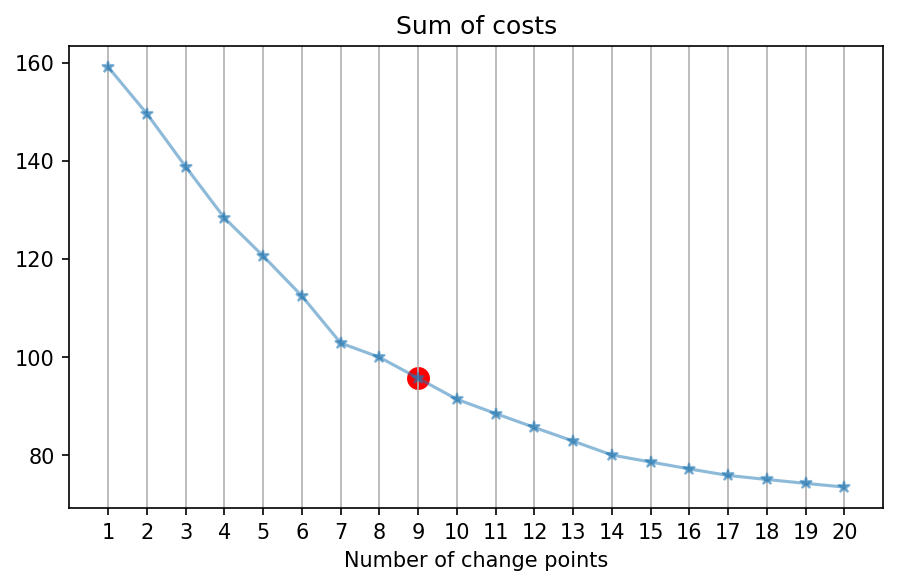

In [120]:
# Choose detection method
algo = rpt.KernelCPD(kernel="linear").fit(trajectory)
#algo = rpt.Dynp(model="l2").fit(song)

# Choose the number of changes (elbow heuristic)
n_bkps_max = 20  # K_max
# Start by computing the segmentation with most changes.
# After start, all segmentations with 1, 2,..., K_max-1 changes are also available for free.
_ = algo.predict(n_bkps_max)

array_of_n_bkps = np.arange(1, n_bkps_max + 1)


def get_sum_of_cost(algo, n_bkps) -> float:
    """Return the sum of costs for the change points `bkps`"""
    bkps = algo.predict(n_bkps=n_bkps)
    return algo.cost.sum_of_costs(bkps)


fig, ax = fig_ax((7, 4))
ax.plot(
    array_of_n_bkps,
    [get_sum_of_cost(algo=algo, n_bkps=n_bkps) for n_bkps in array_of_n_bkps],
    "-*",
    alpha=0.5,
)
ax.set_xticks(array_of_n_bkps)
ax.set_xlabel("Number of change points")
ax.set_title("Sum of costs")
ax.grid(axis="x")
ax.set_xlim(0, n_bkps_max + 1)

# Visually we choose n_bkps=5 (highlighted in red on the elbow plot)
n_bkps = 9                        
_ = ax.scatter([n_bkps], [get_sum_of_cost(algo=algo, n_bkps=n_bkps)], color="r", s=100)


In [121]:
bkps = algo.predict(n_bkps=n_bkps)
print(f"Change points: {bkps} (frame counts)")

Change points: [2, 7, 10, 16, 18, 24, 28, 38, 41, 44] (frame counts)


In [123]:
change_timestamps = np.array(bkps) * 5
change_timestamps = np.insert(change_timestamps, 0, 0)
change_timestamps

In [111]:
get_annotation_text(data[5])

7 Swagger Compilations
7 50JtpsgyQF4 0.9669518808792127
=== Annotation 1 ===
0.0	Silence
0.143673469	Intro
7.261655328	Intro
35.769909297	Intro
50.005283446	Verse
78.400272108	Chorus
92.604535147	Verse
121.018117913	Solo
135.214535147	Chorus
149.391995464	Verse
177.810816326	no_function
192.000907029	Outro
206.159705215	Outro
214.347664399	Silence
218.638390022	End
=== Annotation 2 ===
0.0	Silence
1.933287981	Intro
7.31356009	no_function
21.504331065	no_function
35.684535147	Transition
49.988548752	Verse
64.140929705	Verse
78.365056689	Chorus
92.550022675	Verse
106.797437641	Verse
120.988480725	Transition
135.159682539	Chorus
149.365215419	Chorus
163.542585034	Chorus
177.741609977	Chorus
191.972721088	Outro
199.013424036	no_function
206.086961451	no_function
213.188503401	no_function
214.257324263	Silence
218.62095238	End
